In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [153]:
bike = pd.read_csv('C:/Users/v-ymudgil/Downloads/day (1).csv', index_col='instant')

In [154]:
bike.shape

(730, 15)

In [155]:
bike['dteday'] = bike['dteday'].apply(lambda x: int(x.split('-')[0]))


bike = bike.rename(columns={"dteday": "date"})

In [156]:
bike['season'] = bike['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
import datetime
bike.mnth = bike.mnth.apply(lambda x: datetime.date(1900, x , 1).strftime('%B'))

In [157]:
bike.head()

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,1,spring,0,January,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2,spring,0,January,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,3,spring,0,January,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,4,spring,0,January,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,5,spring,0,January,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [158]:
bike.describe()

,date,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,15.720548,0.500000,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,8.802278,0.500343,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,8.000000,0.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,16.000000,0.500000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,23.000000,1.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,31.000000,1.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [159]:
bike.info()


<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        730 non-null    int64  
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 91.2+ KB


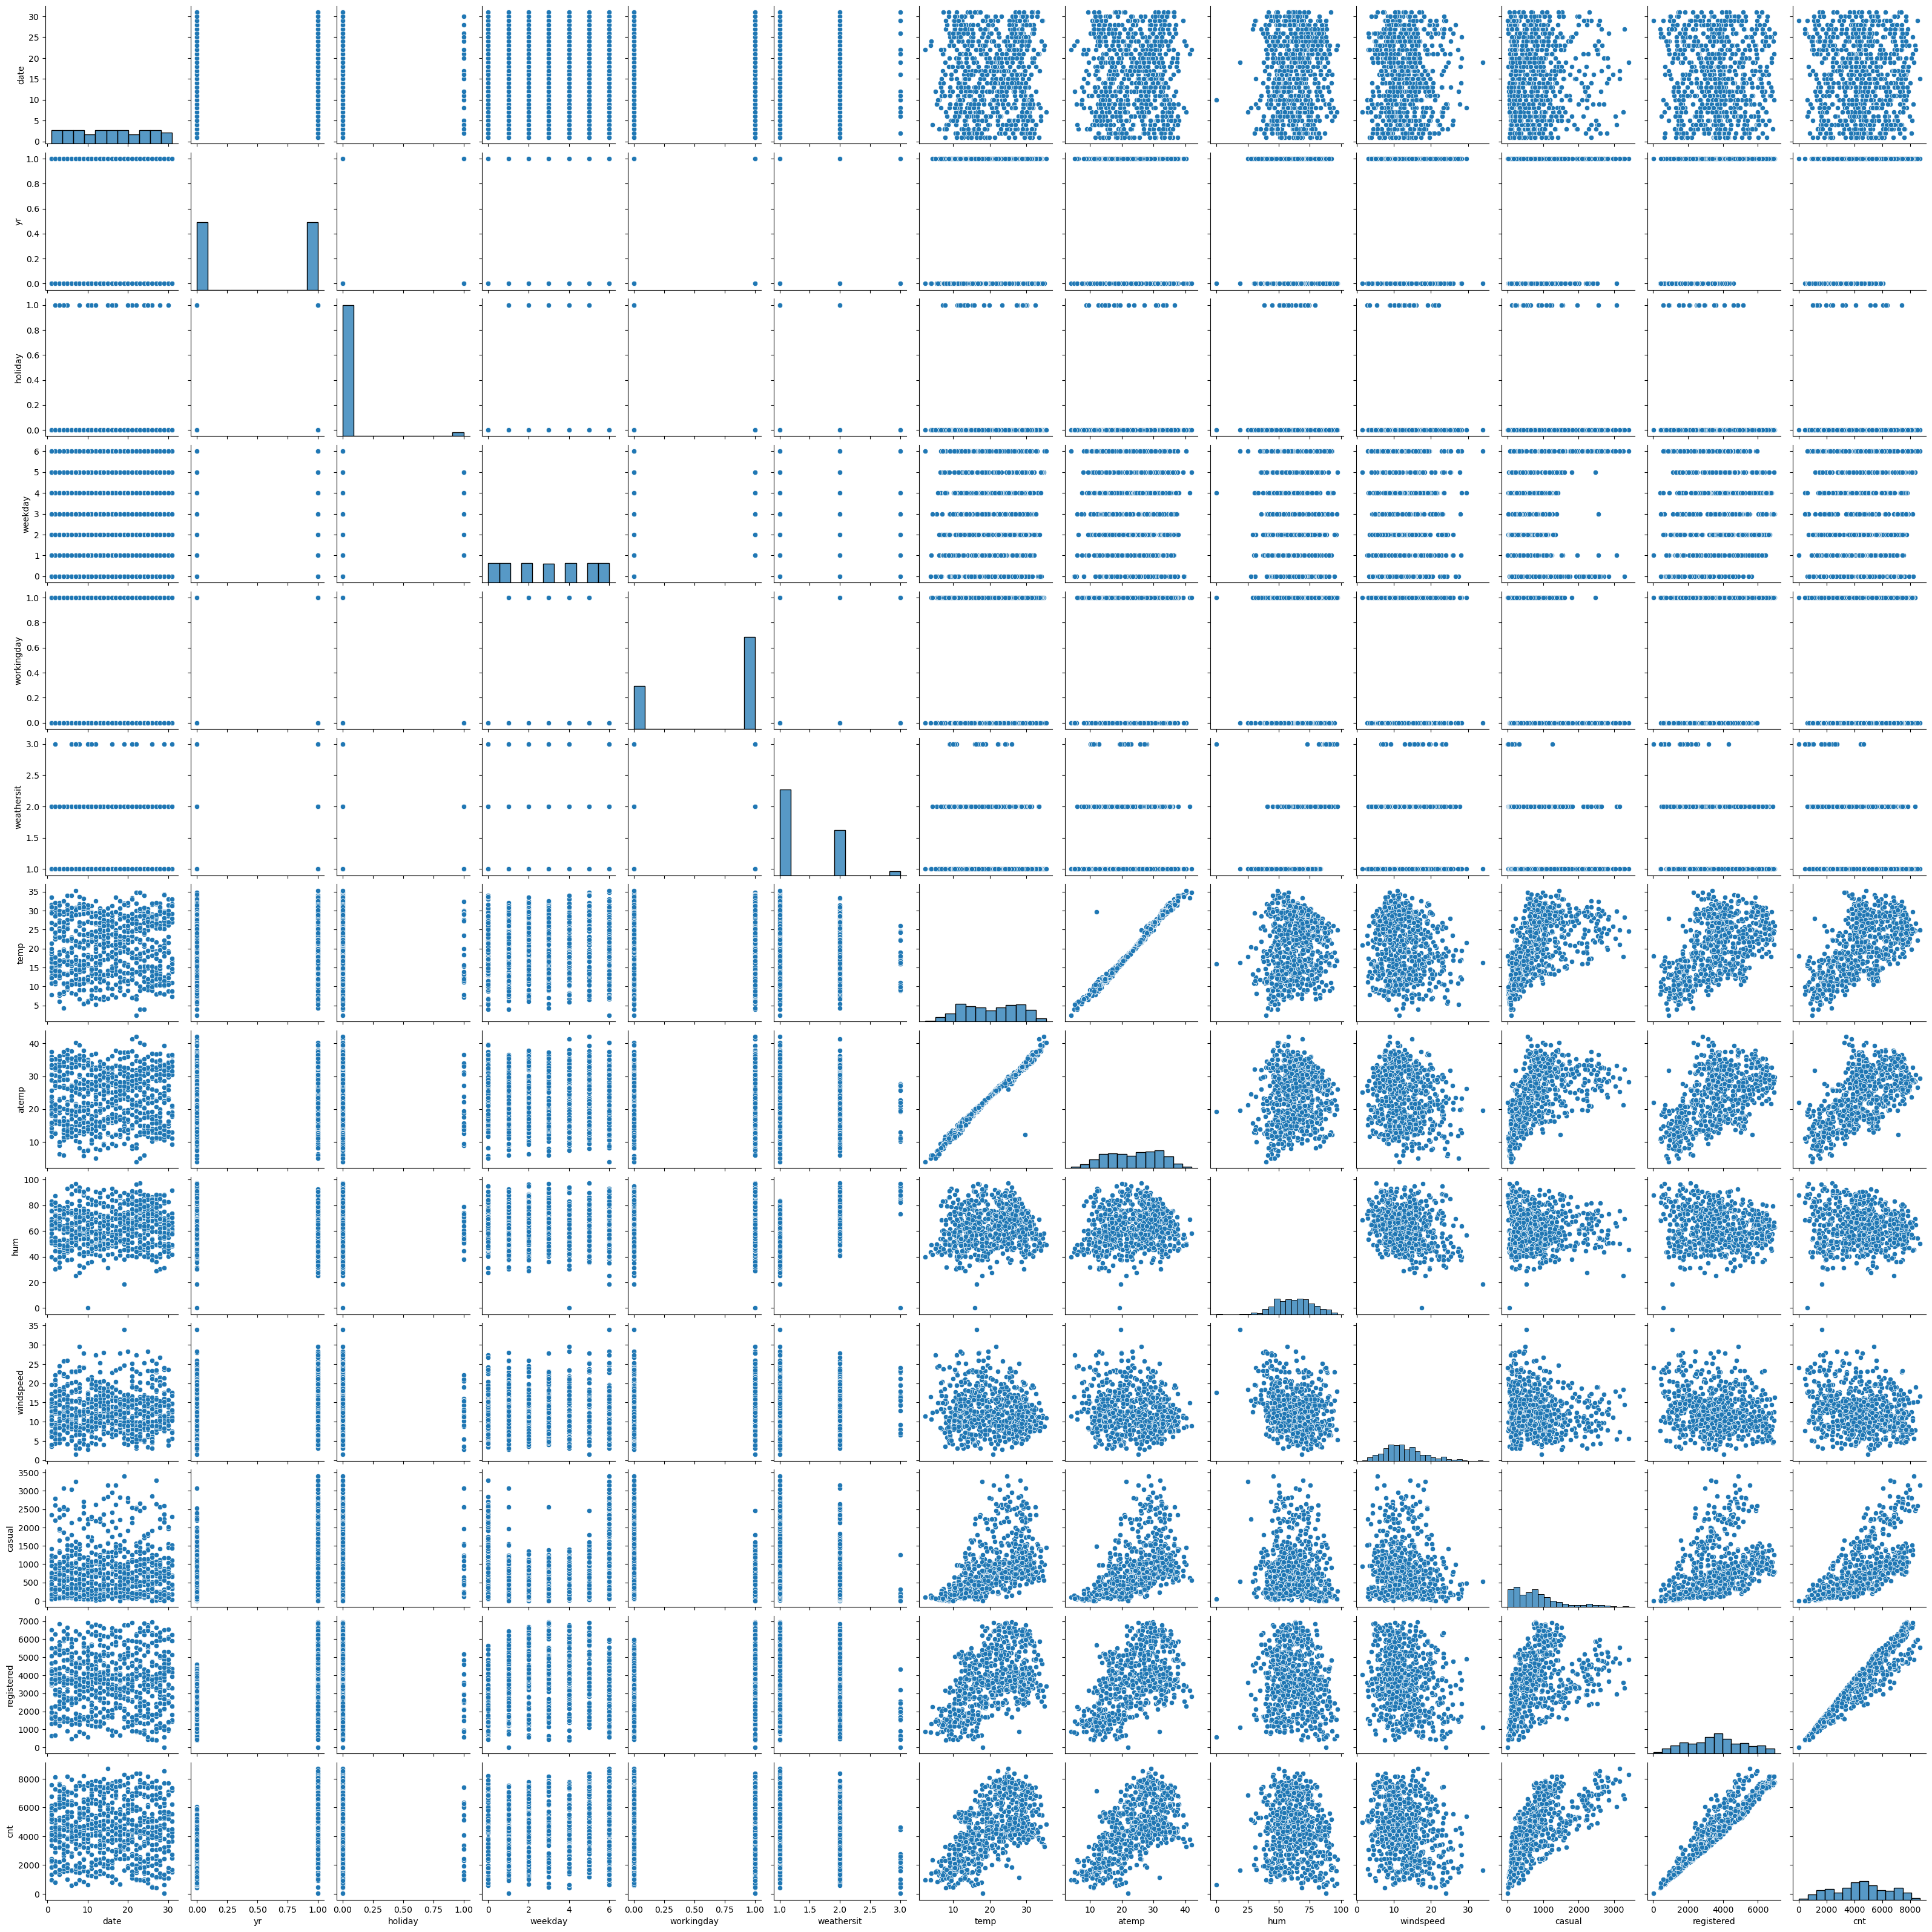

In [160]:
sns.pairplot(bike)
plt.show()


In [161]:
df_train , df_test = train_test_split(bike , train_size = 0.7 , test_size = 0.3 , random_state = 100)

In [162]:
scaler = MinMaxScaler()
columns = ['temp' , 'atemp' , 'hum' , 'windspeed' , 'casual' , 'registered' , 'cnt' ]

In [163]:
import datetime
bike.mnth = bike.mnth.apply(lambda x: datetime.date(1900, x , 1).strftime('%B'))

TypeError: 'str' object cannot be interpreted as an integer

In [166]:
bike['weekday'] = bike.weekday.map({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'})


In [167]:
bike.groupby(by='weekday').weekday.count()

weekday
friday       104
monday       105
saturday     105
sunday       105
thursday     104
tuesday      104
wednesday    103
Name: weekday, dtype: int64

In [168]:
bike['weathersit'] = bike.weathersit.map({1: 'clear', 2: 'mist', 3: 'light', 4: 'heavy'})

In [169]:
headers = ['Temperature', 'Adjusted Temperature']
pd.DataFrame(np.corrcoef(bike['temp'], bike["atemp"]), index=headers, columns=headers)    

,Temperature,Adjusted Temperature
Temperature,1.000000,0.991696
Adjusted Temperature,0.991696,1.000000


In [170]:
bike = bike.drop(columns=['atemp'])

In [171]:
bike.temp.describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

Text(0.5, 0, 'Temperature')

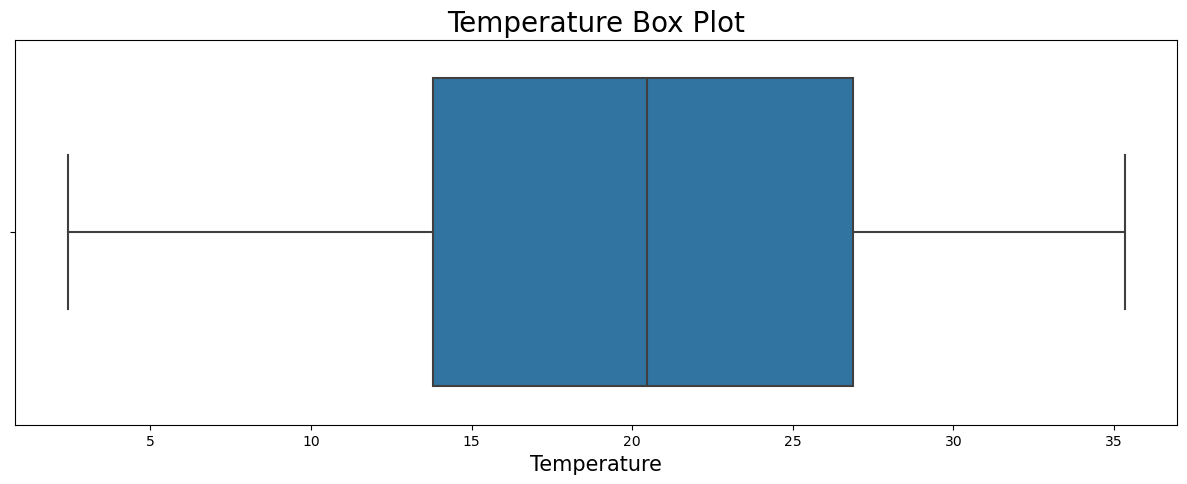

In [172]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=bike, x='temp')
plt.title('Temperature Box Plot', fontdict={'fontsize': 20})
plt.xlabel('Temperature', fontdict={'fontsize': 15})

In [173]:
bike = bike.drop(columns=['casual', 'registered'])

In [174]:
dummy_columns = ['mnth', 'season', 'weekday', 'weathersit']

In [175]:
status1 = pd.get_dummies(bike[dummy_columns], drop_first=True)
status = status1.astype(int)
status.head(10)

,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,...,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light,weathersit_mist
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [176]:
bike = pd.concat([bike, status], axis=1)

In [177]:
bike = bike.drop(columns=dummy_columns)

In [178]:
humidity_check_df = bike[(bike.index > int(69*0.8)) & (bike.index < int(69*1.2))]
humidity_check_df

,date,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_August,mnth_December,...,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light,weathersit_mist
instant,,,,,,,,,,,,,,,,,,,,,
56,25,0,0,1,14.938268,71.2174,23.218113,1461,0,0,...,0,0,0,0,0,0,0,0,0,1
57,26,0,0,0,11.582500,53.7917,12.500257,1969,0,0,...,0,0,0,1,0,0,0,0,0,0
58,27,0,0,0,14.082598,68.0000,8.391616,2402,0,0,...,0,0,0,0,1,0,0,0,0,0
59,28,0,0,1,16.698193,87.6364,19.408962,1446,0,0,...,0,0,1,0,0,0,0,0,0,1
60,1,0,0,1,10.933347,53.5000,14.500475,1851,0,0,...,0,0,0,0,0,0,1,0,0,0
61,2,0,0,1,13.735000,44.9583,20.624811,2134,0,0,...,0,0,0,0,0,0,0,1,0,0
62,3,0,0,1,8.131653,31.8333,15.125518,1685,0,0,...,0,0,0,0,0,1,0,0,0,0
63,4,0,0,1,10.728347,61.0417,13.624182,1944,0,0,...,0,0,0,0,0,0,0,0,0,1
64,5,0,0,0,15.750847,78.9167,16.875357,2077,0,0,...,0,0,0,1,0,0,0,0,0,1


In [179]:
mean_value = humidity_check_df.hum.mean()
mean_value

58.64794230769231

In [180]:
bike.at[int(bike[bike['hum'] == 0.0].hum.index.values), "hum"] = mean_value

In [181]:
bike[bike.hum < 10]

,date,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_August,mnth_December,...,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light,weathersit_mist
instant,,,,,,,,,,,,,,,,,,,,,


In [182]:
scaler = MinMaxScaler()

In [183]:
df_train, df_test = train_test_split(bike, train_size=0.7, random_state=100)

In [184]:
df_train.shape

(510, 30)

In [185]:
df_test.shape

(220, 30)

In [186]:
nm = ['date', 'temp', 'hum', 'windspeed', 'cnt']


In [187]:
df_train[nm] = scaler.fit_transform(df_train[nm])
df_train.head(10)

,date,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_August,mnth_December,...,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light,weathersit_mist
instant,,,,,,,,,,,,,,,,,,,,,
577,1.000000,1,0,1,0.815169,0.659744,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
427,0.066667,1,0,0,0.442393,0.553780,0.255342,0.465255,0,0,...,0,0,0,1,0,0,0,0,0,1
729,0.966667,1,0,0,0.245101,0.377528,0.663106,0.204096,0,1,...,0,0,0,0,1,0,0,0,0,0
483,0.900000,1,0,0,0.395666,0.385516,0.188475,0.482973,0,0,...,1,0,0,1,0,0,0,0,0,1
112,0.700000,0,0,1,0.345824,0.692225,0.380981,0.191095,0,0,...,1,0,0,0,0,0,0,0,0,1
581,0.100000,1,0,0,0.914852,0.543663,0.462538,0.782559,1,0,...,0,0,0,1,0,0,0,0,0,0
501,0.500000,1,0,1,0.719639,0.651757,0.172431,0.851588,0,0,...,1,0,0,0,0,0,0,1,0,0
480,0.800000,1,0,1,0.520271,0.306709,0.164434,0.710308,0,0,...,1,0,0,0,0,0,0,1,0,0
473,0.566667,1,0,1,0.503656,0.487220,0.270032,0.499885,0,0,...,1,0,0,0,0,0,0,1,0,1


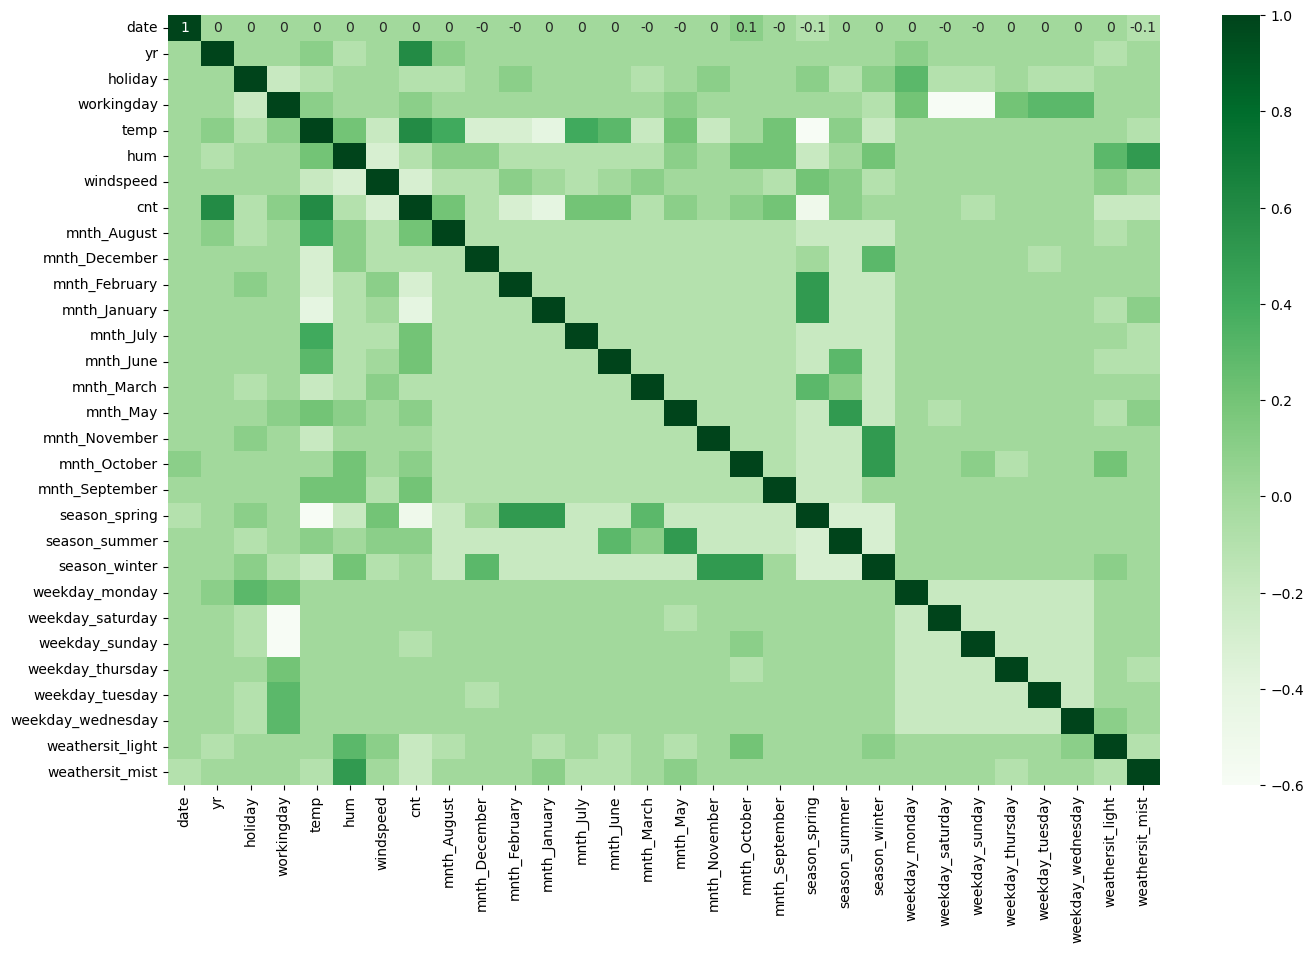

In [190]:
df_train.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(round(df_train.corr(), 1), annot=True, cmap='Greens')
plt.show()

In [192]:
y_train = df_train.pop('cnt')

In [193]:
X_train = df_train

In [201]:
def fetch_vif_df(local_df):
    vif_df = pd.DataFrame()
    vif_df['Features'] = local_df.columns
    vif_df['VIF'] = [variance_inflation_factor(local_df.values, i) for i in range(local_df.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    vif_df = vif_df.sort_values(by='VIF', ascending=False)
    vif_df = vif_df.reset_index(drop=True)
    return vif_df

In [195]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [196]:
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Predictor,Select Status,Ranking
28,weathersit_mist,True,1
27,weathersit_light,True,1
19,season_summer,True,1
20,season_winter,True,1
11,mnth_July,True,1
10,mnth_January,True,1
18,season_spring,True,1
17,mnth_September,True,1
6,windspeed,True,1
5,hum,True,1


In [197]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.1
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          3.78e-191
Time:                        22:31:13   Log-Likelihood:                 519.76
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -939.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2238      0.033      6.752      0.000       0.159       0.289
yr                   0.2300      0.008     28.673      0.000       0.214       0.246
holiday             -0.0583      0.027     -2.169      0.031      -0.111      -0.005
workingday           0.0433      0.012      3.759      0.000       0.021       0.066
temp                 0.5138      0.035     14.852      0.000       0.446       0.582
hum                 -0.1349      0.032     -4.215      0.000      -0.198      -0.072
windspeed           -0.1885      0.026     -7.358      0.000      -0.239      -0.138
mnth_January        -0.0351      0.017     -2.025      0.043      -0.069      -0.001
mnth_July           -0.0535      0.018     -2.960      0.003      -0.089      -0.018
mnth_September       0.0816      0.016      4.959      0.000       0.049       0.114
season_spring       -0.0484      0.021     -2.337      0.020      -0.089      -0.008
season_summer        0.0515      0.015      3.467      0.001       0.022       0.081
season_winter        0.0945      0.017      5.456      0.000       0.060       0.129
weekday_saturday     0.0530      0.015      3.657      0.000       0.025       0.082
weathersit_light    -0.2375      0.027     -8.789      0.000      -0.291      -0.184
weathersit_mist     -0.0545      0.011     -5.149      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       66.719   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.476
Skew:                          -0.684   Prob(JB):                     1.42e-35
Kurtosis:                       5.384   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [199]:
col = col.drop(['holiday'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.5
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          2.73e-191
Time:                        22:31:37   Log-Likelihood:                 517.34
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2150      0.033      6.510      0.000       0.150       0.280
yr                   0.2302      0.008     28.599      0.000       0.214       0.246
workingday           0.0520      0.011      4.793      0.000       0.031       0.073
temp                 0.5134      0.035     14.788      0.000       0.445       0.582
hum                 -0.1334      0.032     -4.153      0.000      -0.197      -0.070
windspeed           -0.1891      0.026     -7.356      0.000      -0.240      -0.139
mnth_January        -0.0357      0.017     -2.054      0.041      -0.070      -0.002
mnth_July           -0.0523      0.018     -2.886      0.004      -0.088      -0.017
mnth_September       0.0796      0.016      4.825      0.000       0.047       0.112
season_spring       -0.0494      0.021     -2.377      0.018      -0.090      -0.009
season_summer        0.0517      0.015      3.473      0.001       0.022       0.081
season_winter        0.0934      0.017      5.376      0.000       0.059       0.128
weekday_saturday     0.0618      0.014      4.425      0.000       0.034       0.089
weathersit_light    -0.2369      0.027     -8.735      0.000      -0.290      -0.184
weathersit_mist     -0.0543      0.011     -5.108      0.000      -0.075      -0.033
==============================================================================
Omnibus:                       73.795   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.839
Skew:                          -0.731   Prob(JB):                     9.87e-42
Kurtosis:                       5.598   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [200]:
col = col.drop(['hum'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          8.68e-189
Time:                        22:31:49   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1657      0.031      5.292      0.000       0.104       0.227
yr                   0.2346      0.008     28.941      0.000       0.219       0.251
workingday           0.0546      0.011      4.967      0.000       0.033       0.076
temp                 0.4724      0.034     13.966      0.000       0.406       0.539
windspeed           -0.1572      0.025     -6.306      0.000      -0.206      -0.108
mnth_January        -0.0398      0.018     -2.252      0.025      -0.074      -0.005
mnth_July           -0.0468      0.018     -2.549      0.011      -0.083      -0.011
mnth_September       0.0736      0.017      4.406      0.000       0.041       0.106
season_spring       -0.0607      0.021     -2.899      0.004      -0.102      -0.020
season_summer        0.0448      0.015      2.980      0.003       0.015       0.074
season_winter        0.0775      0.017      4.499      0.000       0.044       0.111
weekday_saturday     0.0667      0.014      4.710      0.000       0.039       0.094
weathersit_light    -0.2896      0.024    -11.895      0.000      -0.337      -0.242
weathersit_mist     -0.0807      0.009     -9.351      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       73.767   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.147
Skew:                          -0.734   Prob(JB):                     2.30e-41
Kurtosis:                       5.579   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [202]:
fetch_vif_df(X_train_rfe)

,Features,VIF
0,temp,6.82
1,workingday,4.68
2,windspeed,4.66
3,season_spring,2.99
4,season_summer,2.33
5,yr,2.08
6,season_winter,1.91
7,weekday_saturday,1.84
8,mnth_January,1.62
9,mnth_July,1.59


In [203]:

col = col.drop(['workingday'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.5
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          9.49e-185
Time:                        22:32:54   Log-Likelihood:                 496.23
No. Observations:                 510   AIC:                            -966.5
Df Residuals:                     497   BIC:                            -911.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2099      0.031      6.829      0.000       0.150       0.270
yr                   0.2352      0.008     28.339      0.000       0.219       0.251
temp                 0.4741      0.035     13.695      0.000       0.406       0.542
windspeed           -0.1591      0.026     -6.236      0.000      -0.209      -0.109
mnth_January        -0.0394      0.018     -2.181      0.030      -0.075      -0.004
mnth_July           -0.0498      0.019     -2.649      0.008      -0.087      -0.013
mnth_September       0.0728      0.017      4.261      0.000       0.039       0.106
season_spring       -0.0636      0.021     -2.968      0.003      -0.106      -0.022
season_summer        0.0440      0.015      2.860      0.004       0.014       0.074
season_winter        0.0729      0.018      4.139      0.000       0.038       0.107
weekday_saturday     0.0231      0.011      2.032      0.043       0.001       0.045
weathersit_light    -0.2820      0.025    -11.338      0.000      -0.331      -0.233
weathersit_mist     -0.0777      0.009     -8.818      0.000      -0.095      -0.060
==============================================================================
Omnibus:                       78.156   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.451
Skew:                          -0.806   Prob(JB):                     3.97e-40
Kurtosis:                       5.437   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [204]:

fetch_vif_df(X_train_rfe)

,Features,VIF
0,temp,5.16
1,windspeed,4.63
2,season_spring,2.75
3,season_summer,2.24
4,yr,2.07
5,season_winter,1.78
6,mnth_January,1.61
7,mnth_July,1.59
8,weathersit_mist,1.56
9,mnth_September,1.33


In [205]:
col = col.drop(['weekday_saturday'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     224.6
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          4.79e-185
Time:                        22:33:09   Log-Likelihood:                 494.12
No. Observations:                 510   AIC:                            -964.2
Df Residuals:                     498   BIC:                            -913.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2137      0.031      6.945      0.000       0.153       0.274
yr                   0.2347      0.008     28.204      0.000       0.218       0.251
temp                 0.4727      0.035     13.614      0.000       0.404       0.541
windspeed           -0.1568      0.026     -6.131      0.000      -0.207      -0.107
mnth_January        -0.0391      0.018     -2.158      0.031      -0.075      -0.003
mnth_July           -0.0492      0.019     -2.612      0.009      -0.086      -0.012
mnth_September       0.0729      0.017      4.253      0.000       0.039       0.107
season_spring       -0.0639      0.021     -2.974      0.003      -0.106      -0.022
season_summer        0.0437      0.015      2.830      0.005       0.013       0.074
season_winter        0.0730      0.018      4.131      0.000       0.038       0.108
weathersit_light    -0.2813      0.025    -11.275      0.000      -0.330      -0.232
weathersit_mist     -0.0776      0.009     -8.772      0.000      -0.095      -0.060
==============================================================================
Omnibus:                       71.367   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.098
Skew:                          -0.724   Prob(JB):                     1.57e-38
Kurtosis:                       5.469   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [206]:
fetch_vif_df(X_train_rfe)

,Features,VIF
0,temp,5.13
1,windspeed,4.61
2,season_spring,2.74
3,season_summer,2.24
4,yr,2.07
5,season_winter,1.77
6,mnth_January,1.61
7,mnth_July,1.59
8,weathersit_mist,1.56
9,mnth_September,1.33


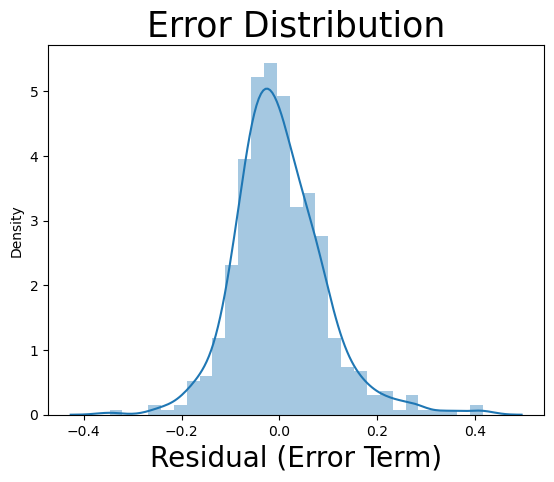

In [207]:
y_train_pred = lr_model.predict(X_train_sm)
residual = y_train_pred - y_train
sns.distplot(residual)
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 20})
plt.title('Error Distribution', fontdict={'fontsize': 25})
plt.show()

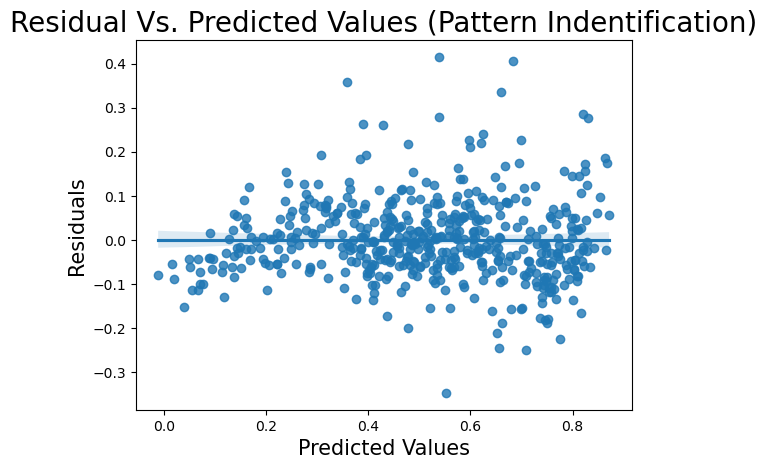

In [208]:
sns.regplot(x=y_train_pred, y=residual)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

In [209]:
fetch_vif_df(X_train_rfe)

,Features,VIF
0,temp,5.13
1,windspeed,4.61
2,season_spring,2.74
3,season_summer,2.24
4,yr,2.07
5,season_winter,1.77
6,mnth_January,1.61
7,mnth_July,1.59
8,weathersit_mist,1.56
9,mnth_September,1.33


In [211]:
df_test[numerical_variables] = scaler.transform(df_test[numerical_variables])
df_test.head(10)

,date,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_August,mnth_December,...,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light,weathersit_mist
instant,,,,,,,,,,,,,,,,,,,,,
185,0.100000,0,1,0,0.831783,0.575080,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
536,0.633333,1,0,1,0.901354,0.516506,0.153728,0.712034,0,0,...,1,0,0,0,0,0,0,1,0,0
300,0.866667,0,0,1,0.511964,0.798722,0.334206,0.303382,0,0,...,0,1,0,0,0,1,0,0,0,1
222,0.300000,0,0,1,0.881625,0.301917,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,1,0,0
153,0.033333,0,0,1,0.817246,0.149627,0.537414,0.569029,0,0,...,1,0,0,0,0,1,0,0,0,0
405,0.266667,1,0,1,0.256524,0.478167,0.326196,0.438104,0,0,...,0,0,0,0,0,1,0,0,0,0
199,0.566667,0,0,1,0.856704,0.592119,0.372990,0.510354,0,0,...,0,0,1,0,0,0,0,0,0,0
172,0.666667,0,0,1,0.774672,0.744409,0.276724,0.553728,0,0,...,0,0,0,0,0,0,1,0,0,1
513,0.900000,1,1,0,0.814131,0.624068,0.331536,0.692706,0,0,...,1,0,1,0,0,0,0,0,0,0


In [212]:
y_test = df_test.pop('cnt')

In [213]:
X_test = df_test

In [216]:
X_test_new = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)

y_test_pred = lr_model.predict(X_test_new)

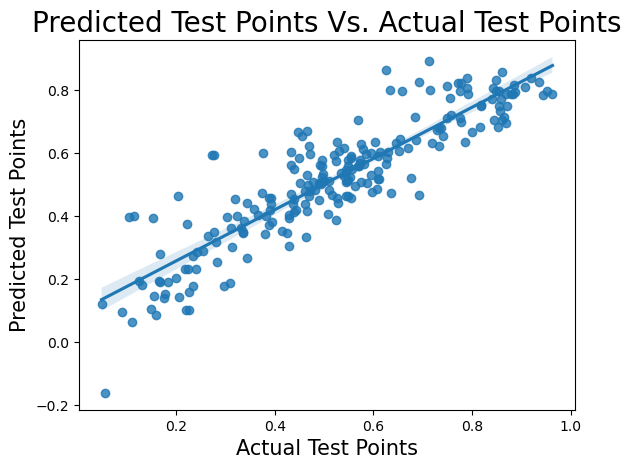

In [217]:
corr_plot = sns.regplot(x=y_test, y=y_test_pred)
plt.title('Predicted Test Points Vs. Actual Test Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Test Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 15})
plt.show()

In [218]:
from sklearn.metrics import r2_score

In [219]:
r2_score(y_test, y_test_pred)

0.8009759499890198